## 0. 데이터 준비

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

# mnist = keras.datasets.mnist
mnist = tf.keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


In [4]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<br>△ 28x28 크기의 숫자 이미지<br><br>

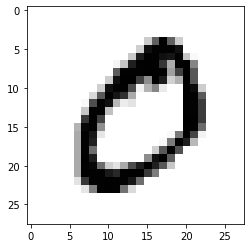

In [6]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [7]:
print(y_train[1])

0


<br>**학습용 데이터와 시험용 데이터**<br>

---

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
np.where(x_train == 255)

(array([    0,     1,     1, ..., 59997, 59998, 59999]),
 array([ 5,  9, 14, ..., 23, 17, 11]),
 array([21, 20, 20, ..., 15, 20, 11]))

In [18]:
x_train.shape

(60000, 28, 28)

<br>1. 숫자 손글씨 이미지의 실제 픽셀값은 0~255 사이 범위를 가지므로 255.0으로 나누어 최소값이 0, 최대값이 1에 근접하도록 나오는지 확인<br><br>

In [33]:
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))
print(x_train_norm.shape)

최소값: 0.0  최대값: 1.0
(60000, 28, 28)


## 1. 딥러닝 네트워크 설계하기

#### Sequential Model을 사용해보자
---

- 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법 사용<br><br>
- Sequential API는 개발의 자유도는 많이 떨어지지만, 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있다.

In [31]:
# LeNet 딥러닝 네트워크 설계

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수 :', len(model.layers))

Model에 추가된 Layer 개수 : 7


<br>

![image](https://user-images.githubusercontent.com/103712369/168478057-3527bd1c-069c-41ec-a845-42c92da74734.png)


- 1) Conv2D 레이어의 첫번째 인자는 사용하는 이미지 특징의 수.(=filter 갯수)<br>16, 32개의 filter를 사용함.<br> 10개의 숫자가 아니라 강아지의 특징을 잡아내기 위해서는 더 많은 filter의 갯수가 필요할 것이다.<br><br>
- 2) Dense 레이어의 첫번째 인자는 분류기에 사용되는 뉴런의 수. 이 값이 클수록 복잡한 분류기 만들 수 있음.<br>10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개 총 52개의 클래스를 분류해야 함.<br>따라서, 32보다 큰 64, 128 등을 고려해 볼 수 있음.<br><br>
- 3) 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 **클래스 수**. 숫자 인식기에서는 10, 알파벳 인식기에서는 52

## 딥러닝 네트워크 학습시키기

- 우리가 만든 네트워크의 입력은 `(데이터의 갯수, 이미지 크기 x, 이미지 크기 y, 채널수)`<br>
- `input_shape = (28, 28, 1)`에서 1은 흑백이미지를 의미함.

In [34]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


<br>

- `epoch = 10` >> 60,000개의 데이터를 10번 반복 사용해서 학습시킨다.<br><br>

In [40]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1920 - accuracy: 0.9418
Epoch 2/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0639 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0460 - accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0366 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0295 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0246 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0168 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 76s 41m

## 얼마나 잘 만들었는지 확인하기
#### 테스트 데이터로 성능을 확인해보자

---

In [64]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 [==============================] - 2s 7ms/step - loss: 0.0364 - accuracy: 0.9905
test_loss: 0.03638090938329697 
test_accuracy: 0.9904999732971191


- MNIST 데이터셋 참고문헌을 보면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른것을 알 수 있다.<br>
- 즉, 한 번도 본 적이 없는 필체의 손글씨가 섞여있다.

#### 어떤 데이터를 잘못 추론했을까? 눈으로 확인해보자

---

- `model.predict()`를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다.<br><br>
- 우리가 만든 model은 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수.<br>이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 된다.


In [57]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

In [58]:
idx = 100 # 1번째 x_test를 살펴보자
print('model.predict() 결과 :', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 :', predicted_labels[idx])
print('실제 데이터의 라벨 :', y_test[idx])

# print(predicted_result[idx].max())

model.predict() 결과 : [7.7341744e-11 2.0468929e-13 6.7858109e-21 1.3425911e-15 1.0086635e-09
 8.5547729e-09 1.0000000e+00 4.3843342e-17 9.2745189e-10 3.8759902e-15]
model이 추론한 가장 가능성이 높은 결과 : 6
실제 데이터의 라벨 : 6


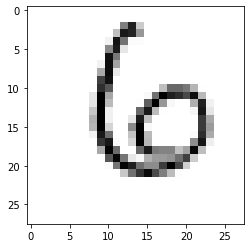

In [54]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

<br>

- model이 99퍼센트의 정확도로 정답을 맞춘다면 1퍼센터의 오답은, 즉 실제 라벨과 추론한 숫자가 다른경우를 확인해보자<br><br>

예측확률분포 : [1.9325878e-05 6.2017627e-09 2.3962588e-05 2.6205817e-01 4.0198902e-06
 7.2500569e-01 5.0212125e-06 3.0462395e-08 1.2868539e-02 1.5298952e-05]
라벨 : 3, 예측결과 : 5


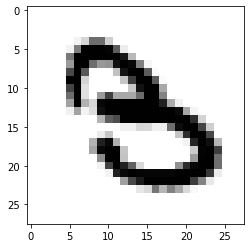

예측확률분포 : [9.7387385e-08 7.7020665e-08 2.2825269e-08 3.8784087e-06 1.1583986e-06
 1.7269004e-07 4.3906480e-12 9.9868888e-01 3.5966696e-08 1.3055665e-03]
라벨 : 9, 예측결과 : 7


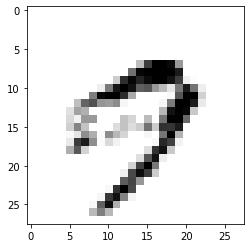

예측확률분포 : [6.6193953e-02 1.2231385e-07 1.2959923e-05 1.7136286e-04 1.8616896e-06
 9.2057914e-01 1.2892954e-02 7.7831652e-09 1.0760986e-04 3.9963368e-05]
라벨 : 6, 예측결과 : 5


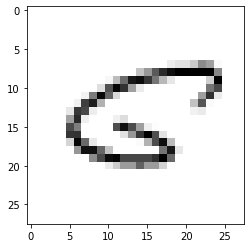

예측확률분포 : [1.4038187e-02 3.5085243e-06 4.3260098e-09 1.5809783e-06 2.1123993e-08
 9.1791505e-01 3.1548543e-04 2.2881382e-08 6.7725621e-02 5.2960888e-07]
라벨 : 8, 예측결과 : 5


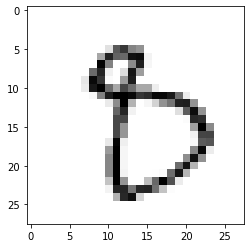

예측확률분포 : [2.2319804e-05 9.9982363e-01 3.1300760e-07 7.9611677e-09 1.1071884e-04
 2.2137028e-09 4.3051768e-05 4.1803336e-10 3.4606678e-08 4.3658730e-09]
라벨 : 6, 예측결과 : 1


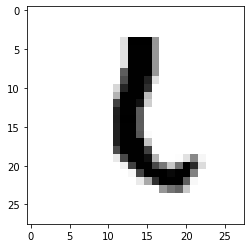

In [59]:
import random
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 보자.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
# wrong_predict_list 에서 랜덤하게 5개만 뽑자.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print('예측확률분포 : '+str(predicted_result[n]))
    print('라벨 : '+str(y_test[n])+', 예측결과 : '+ str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

<br>△ 틀린경우를 보니 model의 추론결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있음.<br>model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있다.<br><br>

## 더 좋은 네트워크 만들어 보기

- 딥러닝 구조 자체는 바꾸지 않으면서 해볼 수 있는 방법 있다.<br><br>
1) `딥러닝 네트워크 설계하기 3장`에서 하이퍼 파라미터(Conv2D 레이어의 `입력 이미지 특징 수` / Dense 레이어에서 분류기에 사용되는 `뉴런 수` / 학습 반복 횟수인 `epoch 값` 변경)

In [66]:
# 바꿔 볼 수 있는 하이퍼 파라미터들
n_channel_1 = 16
n_channel_2 = 32
n_dense=32
n_train_epoch=10

In [67]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(n_dense, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print('test loss : {}'.format(test_loss))
print('test accuracy : {}'.format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               